In [1]:
import sys
from pathlib import Path

ROOT = Path().resolve().parent  # part de /notebooks → remonte à la racine
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))


import pandas as pd
from src.utils.path import PROCESSED_DIR, PRED_DIR
import matplotlib.pyplot as plt

from src.utils.tools import reconstruct_prices

## Dataframe informations

In [2]:
DATA_PATH = PROCESSED_DIR / "dataset_full.parquet"

df = pd.read_parquet(DATA_PATH)
print(df.columns) # Le df est indexé sur la date 
print(df['MA_5_CAC40'])



Index(['Close_CAC40', 'High_CAC40', 'Low_CAC40', 'Open_CAC40', 'Volume_CAC40',
       'Close_STOXX600', 'High_STOXX600', 'Low_STOXX600', 'Open_STOXX600',
       'Volume_STOXX600',
       ...
       'log_Volume_STOXX600_lag5', 'log_Return_STOXX600_lag5', 'day_of_week',
       'day_of_month', 'month', 'quarter', 'is_month_end', 'is_month_start',
       'is_start_of_week', 'is_end_of_week'],
      dtype='object', length=152)
Date
2018-01-03            NaN
2018-01-04            NaN
2018-01-05            NaN
2018-01-08            NaN
2018-01-09            NaN
                 ...     
2025-05-08    7683.208008
2025-05-09    7703.321973
2025-05-12    7697.975977
2025-05-13    7722.409961
2025-05-14    7757.791992
Name: MA_5_CAC40, Length: 1850, dtype: float64


## Dataframe visualization
### Index plots

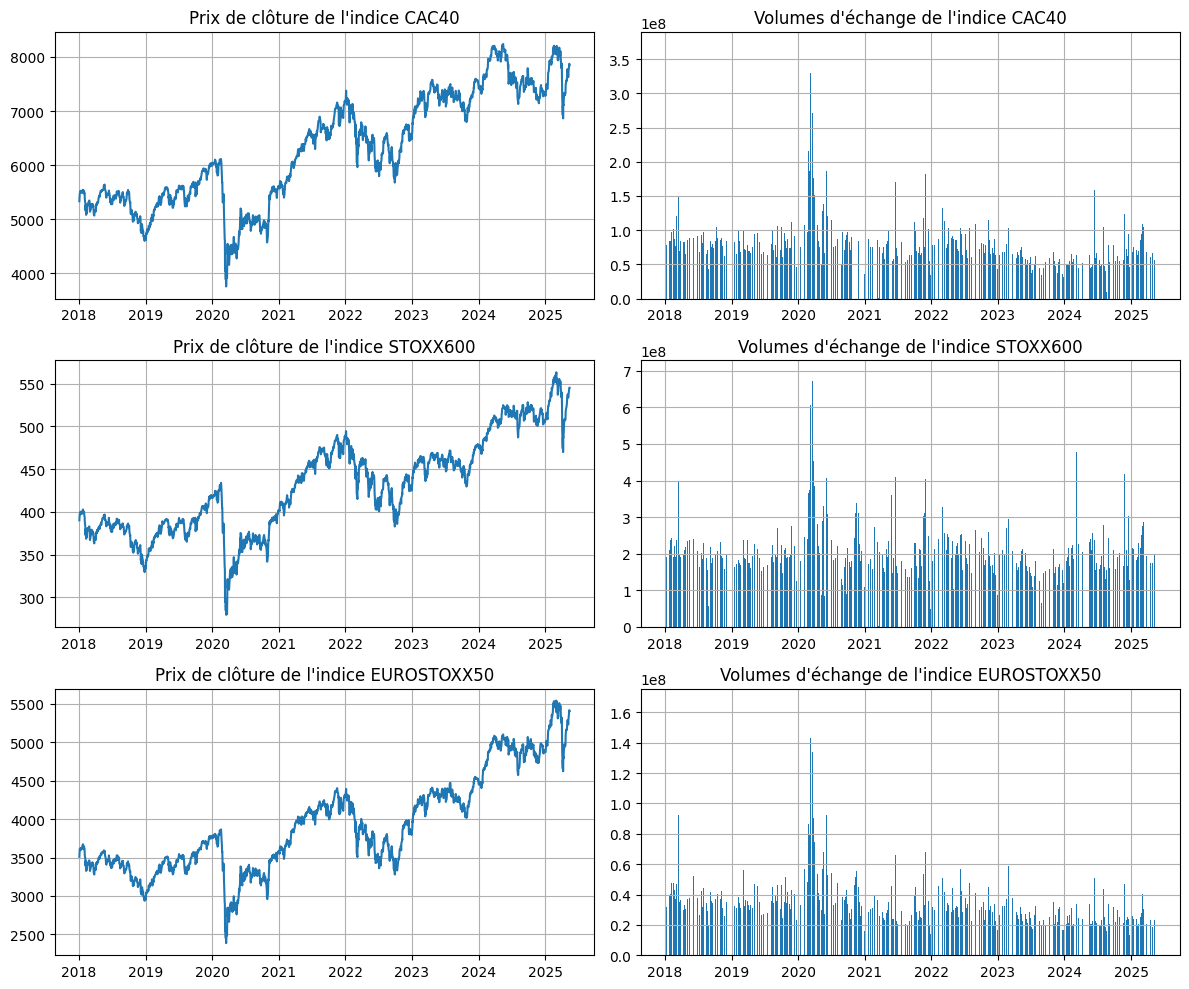

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [3]:
closing_prices = ["Close_CAC40", "Close_STOXX600", "Close_EUROSTOXX50"]
volumes = ["Volume_CAC40", "Volume_STOXX600", "Volume_EUROSTOXX50"]
index = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
for i in range(3):
    axes[i, 0].plot(df.index, df[closing_prices[i]])
    axes[i, 0].set_title(f"Prix de clôture de l'indice {index[i]}")
    axes[i, 0].grid(True)

    axes[i, 1].bar(df.index, df[volumes[i]])
    axes[i, 1].set_title(f"Volumes d'échange de l'indice {index[i]}")
    axes[i, 1].grid(True)

    plt.tight_layout()
plt.show()
missing_dates = df[df["Volume_STOXX600"].isna()]
print(missing_dates.index)


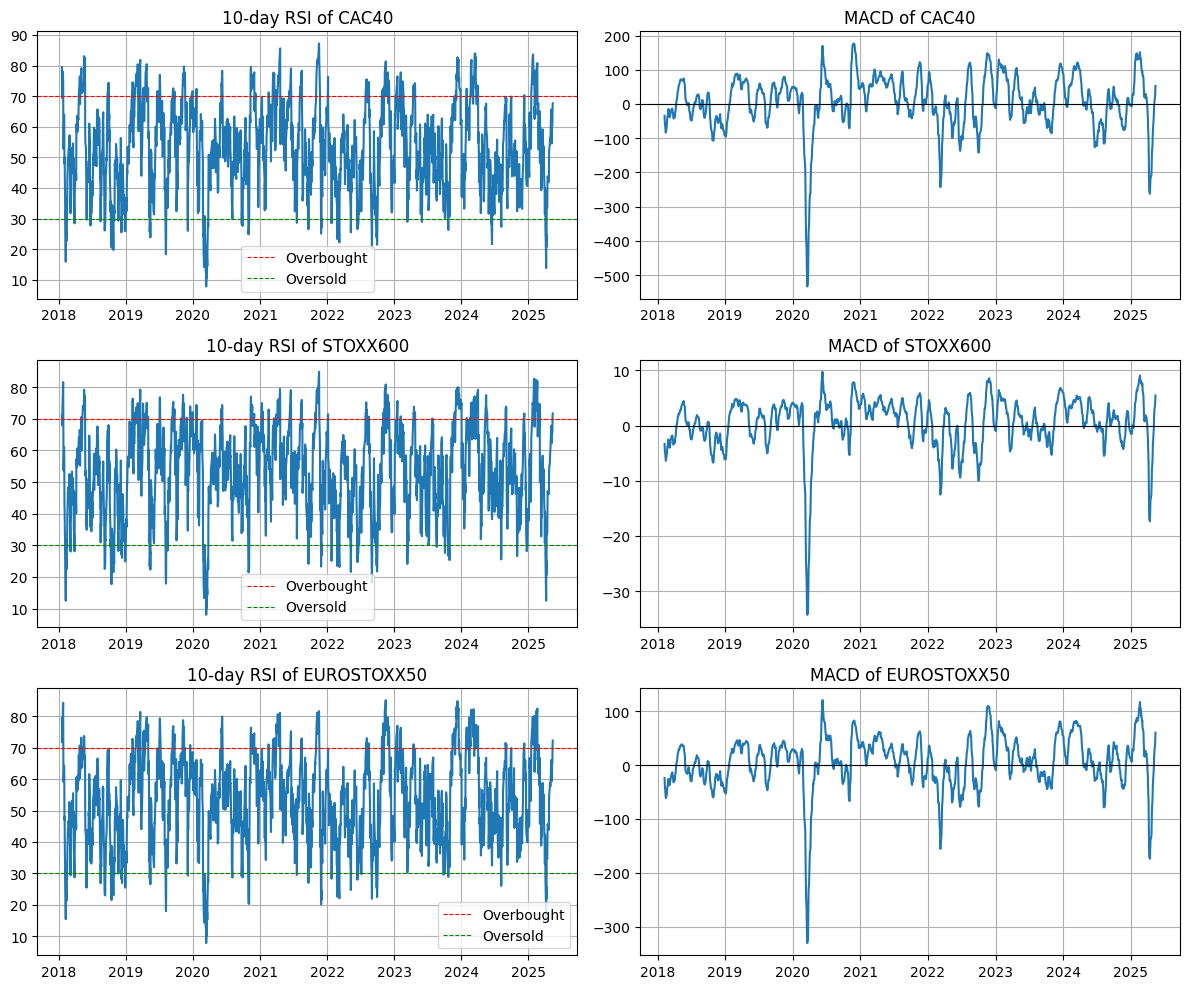

In [4]:
rsi_columns = ["RSI_10_CAC40", "RSI_10_STOXX600", "RSI_10_EUROSTOXX50"]
macd_columns = ["MACD_CAC40", "MACD_STOXX600", "MACD_EUROSTOXX50"]
index_names = ["CAC40", "STOXX600", "EUROSTOXX50"]

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i in range(3):
    # RSI plot
    axes[i, 0].plot(df.index, df[rsi_columns[i]])
    axes[i, 0].set_title(f"10-day RSI of {index_names[i]}")
    axes[i, 0].axhline(70, color='r', linestyle='--', linewidth=0.8, label="Overbought")
    axes[i, 0].axhline(30, color='g', linestyle='--', linewidth=0.8, label="Oversold")
    axes[i, 0].legend()
    axes[i, 0].grid(True)

    # MACD plot
    axes[i, 1].plot(df.index, df[macd_columns[i]])
    axes[i, 1].set_title(f"MACD of {index_names[i]}")
    axes[i, 1].axhline(0, color='black', linewidth=0.8)
    axes[i, 1].grid(True)

plt.tight_layout()
plt.show()


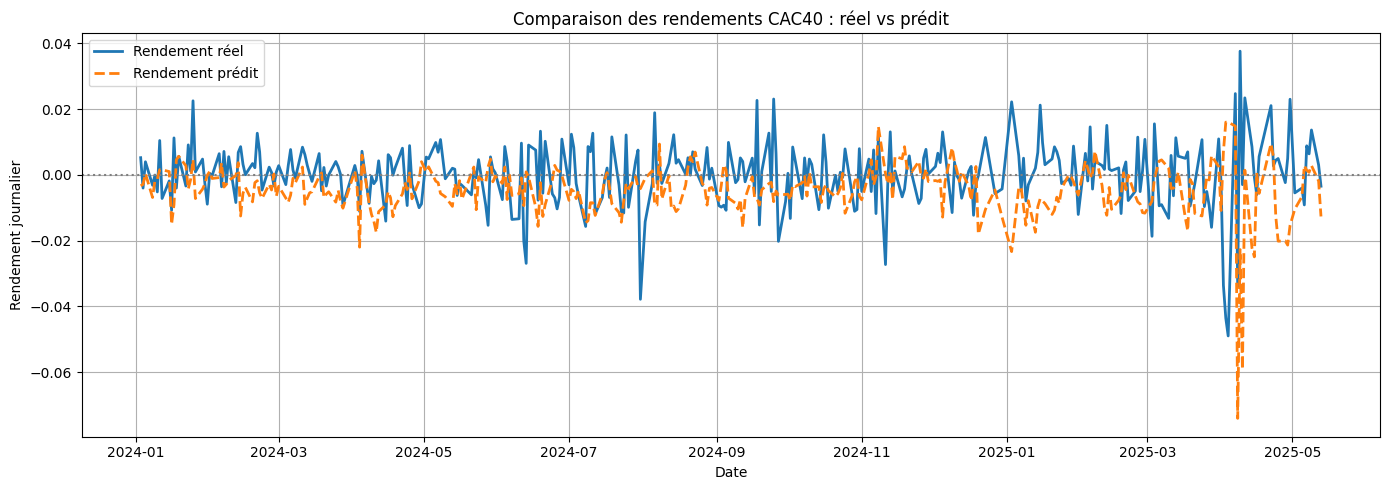

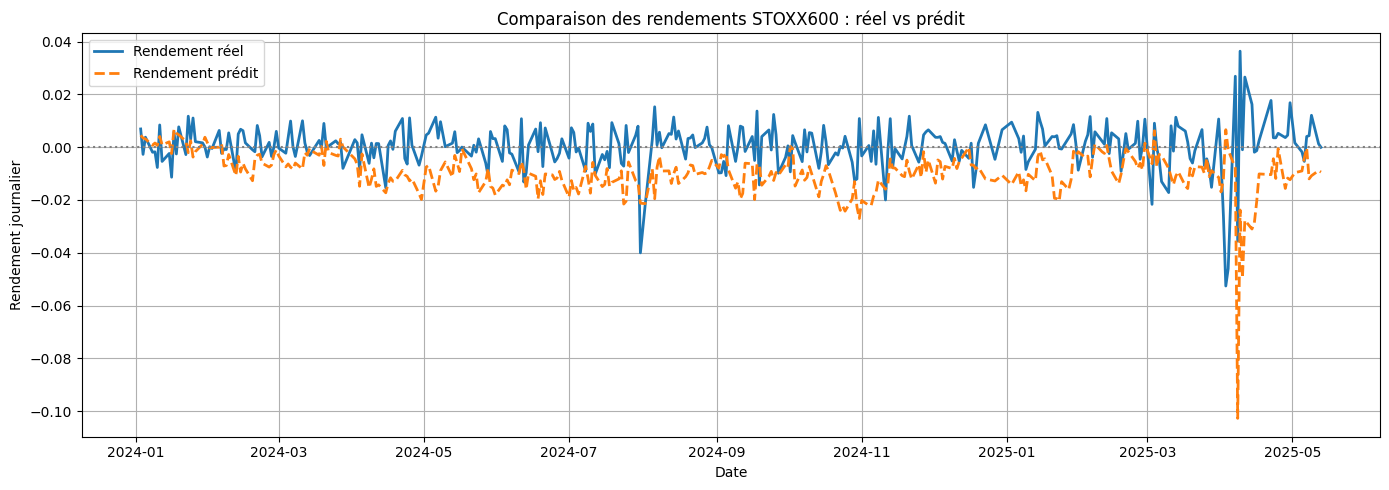

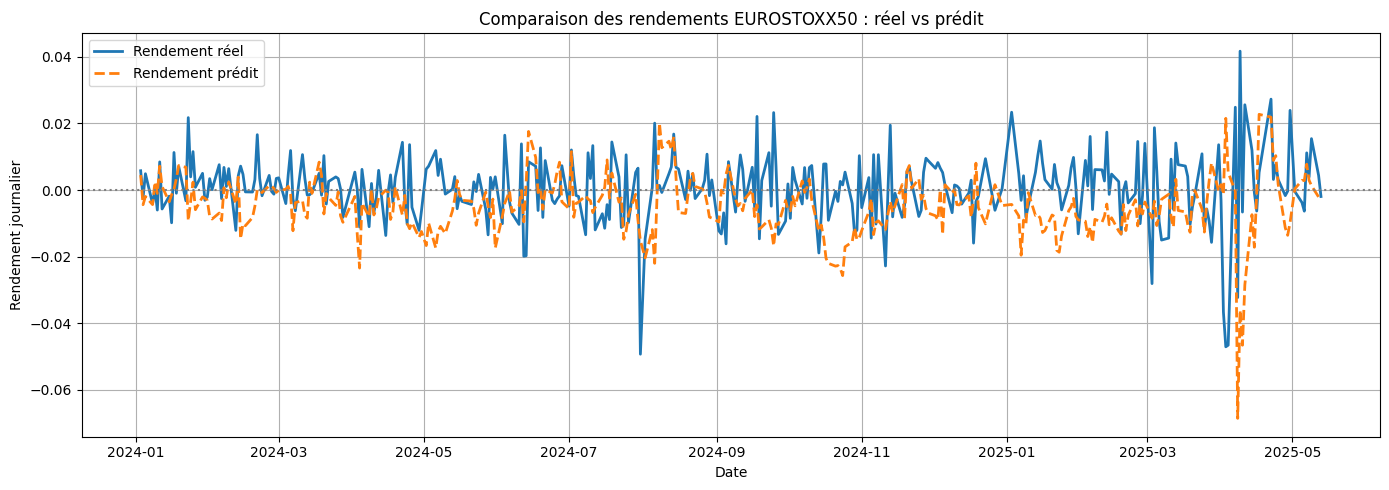

In [5]:

y_test = pd.read_parquet(PRED_DIR / "y_test_df.parquet")
y_pred_df = pd.read_parquet(PRED_DIR / "y_pred_df.parquet")


for index in ["CAC40", "STOXX600", "EUROSTOXX50"]:
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.index, y_test[f"Return_{index}_t+1"], label="Rendement réel", linewidth=2)
    plt.plot(y_test.index, y_pred_df[f"Return_{index}_t+1"], label="Rendement prédit", linestyle="--", linewidth=2)
    plt.axhline(0, color="gray", linestyle=":")
    plt.title(f"Comparaison des rendements {index} : réel vs prédit")
    plt.xlabel("Date")
    plt.ylabel("Rendement journalier")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


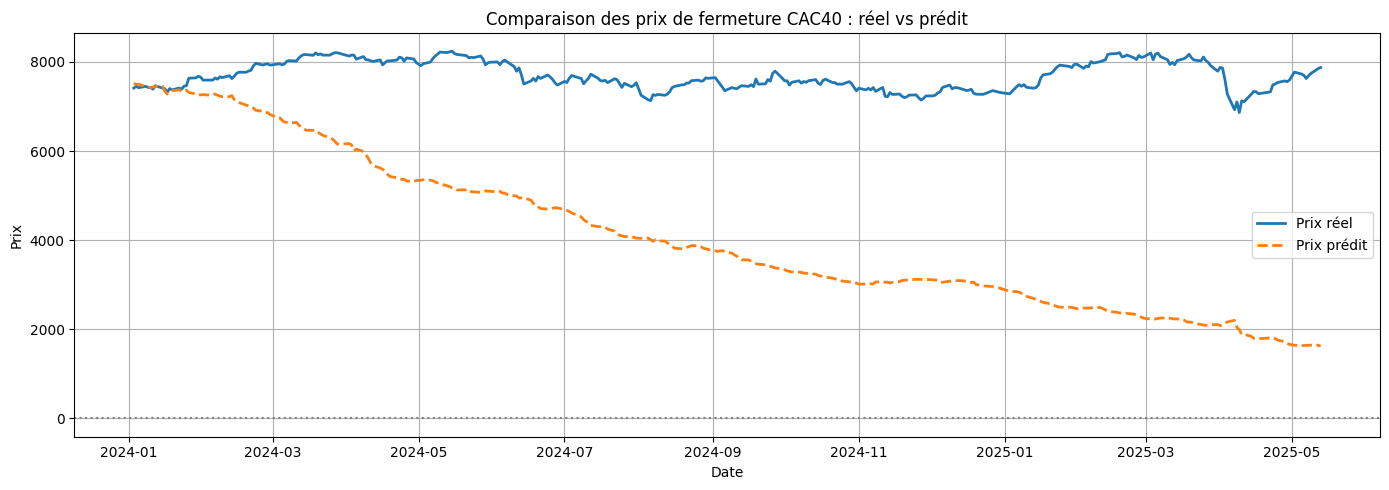

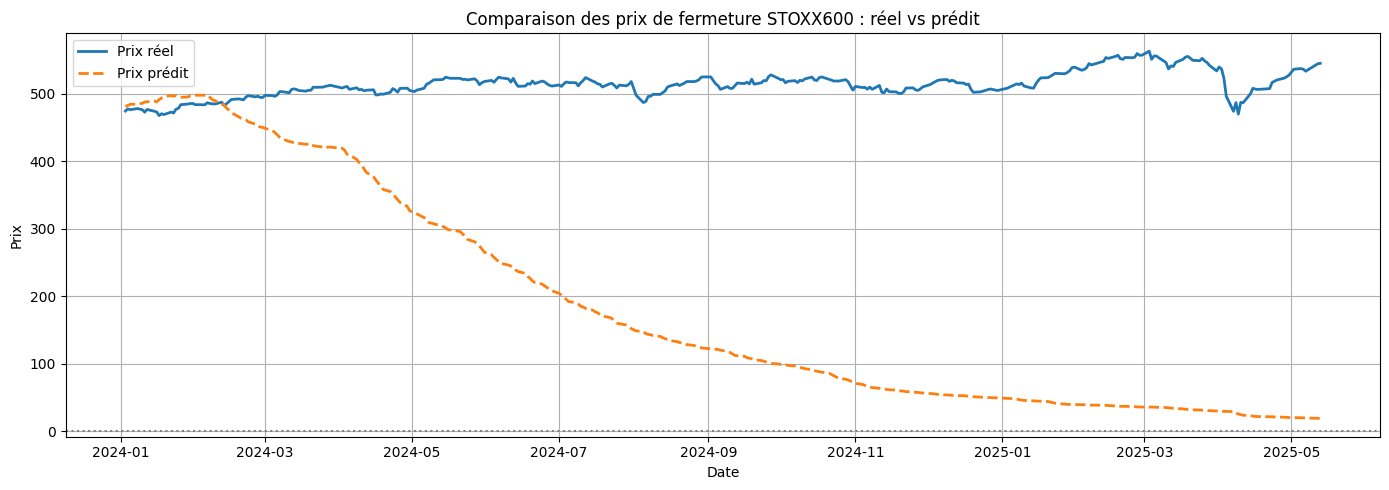

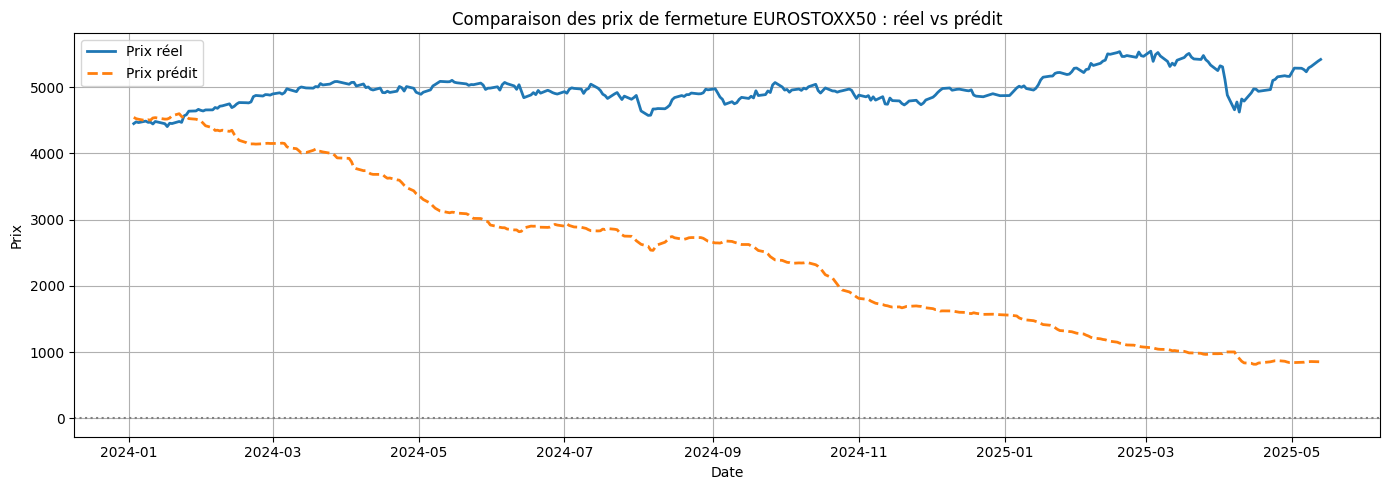

,Return_CAC40_t+1,Return_STOXX600_t+1,Return_EUROSTOXX50_t+1
count,340.000000,340.000000,340.000000
mean,-0.004524,-0.009486,-0.004904
std,0.007945,0.008586,0.008838
min,-0.074062,-0.102694,-0.068528
25%,-0.007978,-0.012939,-0.009203
50%,-0.003836,-0.009023,-0.004355
75%,-0.000118,-0.004436,-0.000234
max,0.016030,0.006749,0.022739


In [6]:
y_test = pd.read_parquet(PRED_DIR / "y_test_df.parquet")
y_pred_df = pd.read_parquet(PRED_DIR / "y_pred_df.parquet")
closing_prices = pd.read_parquet(PRED_DIR / "closing_prices.parquet")
initial_price = {"CAC40" : 7543.18017578125, "STOXX600" : 479.0199890136719, "EUROSTOXX50" : 4521.64990234375}

for index in ["CAC40", "STOXX600", "EUROSTOXX50"]:
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.index, closing_prices[f"Close_{index}"], label="Prix réel", linewidth=2)
    plt.plot(y_test.index, reconstruct_prices(initial_price[index], y_pred_df[f"Return_{index}_t+1"]), label="Prix prédit", linestyle="--", linewidth=2)
    plt.axhline(0, color="gray", linestyle=":")
    plt.title(f"Comparaison des prix de fermeture {index} : réel vs prédit")
    plt.xlabel("Date")
    plt.ylabel("Prix")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
y_pred_df.describe()



## Visualisation de la corrélation des features
On considère que la corrélation entre deux variables est bénéfique (corrélation faible) que si r < 0.8

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)


# Supposons que df soit ton DataFrame contenant toutes tes features
# Par exemple : df = pd.read_csv('features.csv')

# Calcul de la matrice de corrélation
#On enlève les colonnes initialement issues de yfinance, elles ont déjà été rajoutée une fois transformée en lag et en log
print(list(df.columns))

cols = ['Open', 'Close', 'High', 'Low', 'Volume']
indices = ["CAC40", "STOXX600", "EUROSTOXX50"]
col_to_drop = []

for col in cols:
    for ind in indices: 
        col_to_drop.append(f'{col}_{ind}')

df = df.drop(columns = col_to_drop)
print(list(df.columns))


corr_matrix = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(100, 80))  # Tu peux ajuster la taille selon ton nombre de features
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des features')
plt.show()


['Close_CAC40', 'High_CAC40', 'Low_CAC40', 'Open_CAC40', 'Volume_CAC40', 'Close_STOXX600', 'High_STOXX600', 'Low_STOXX600', 'Open_STOXX600', 'Volume_STOXX600', 'Close_EUROSTOXX50', 'High_EUROSTOXX50', 'Low_EUROSTOXX50', 'Open_EUROSTOXX50', 'Volume_EUROSTOXX50', 'MA_5_CAC40', 'MACD_CAC40', 'EMA_10_CAC40', 'SMA_10_CAC40', 'ADX_10_CAC40', 'APO_10_CAC40', 'CCI_10_CAC40', 'MFI_10_CAC40', 'RSI_10_CAC40', 'ATR_10_CAC40', 'MA_5_EUROSTOXX50', 'MACD_EUROSTOXX50', 'EMA_10_EUROSTOXX50', 'SMA_10_EUROSTOXX50', 'ADX_10_EUROSTOXX50', 'APO_10_EUROSTOXX50', 'CCI_10_EUROSTOXX50', 'MFI_10_EUROSTOXX50', 'RSI_10_EUROSTOXX50', 'ATR_10_EUROSTOXX50', 'MA_5_STOXX600', 'MACD_STOXX600', 'EMA_10_STOXX600', 'SMA_10_STOXX600', 'ADX_10_STOXX600', 'APO_10_STOXX600', 'CCI_10_STOXX600', 'MFI_10_STOXX600', 'RSI_10_STOXX600', 'ATR_10_STOXX600', 'log_Close_CAC40', 'log_Close_CAC40_rolling_mean5', 'log_Close_CAC40_rolling_std5', 'log_Close_EUROSTOXX50', 'log_Close_EUROSTOXX50_rolling_mean5', 'log_Close_EUROSTOXX50_rolling_s

Index(['2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
       '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-20',
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03',
       '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-17'],
      dtype='object', name='Date')


TypeError: ticklabel_format() takes 0 positional arguments but 1 was given

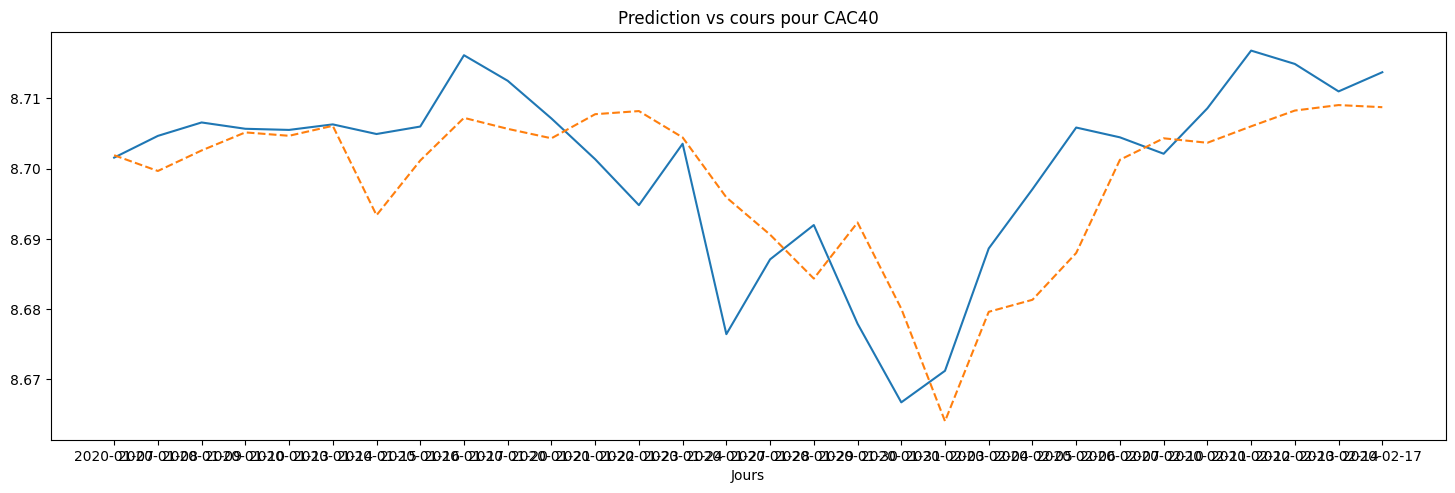

In [ ]:

y_trues = pd.read_csv(PRED_DIR / "y_trues_df.csv", index_col=0)
y_preds = pd.read_csv(PRED_DIR / "y_pred_df.csv", index_col = 0)

print(y_preds.index)

n_outputs = y_preds.shape[1]  # 3 dans ton cas : CAC40, STOXX600, EUROSTOXX50
indices = ['CAC40', 'STOXX600', 'EUROSTOXX50']

# Tracer chaque variable cible
plt.figure(figsize=(18, 6 * n_outputs))
i=0
for ind in indices:
    
    plt.subplot(n_outputs, 1, i+1)
    plt.plot(y_preds.index, y_trues[f"log_Close_{ind}"], label=f'Cours réel {indices[i]}')
    plt.plot(y_preds.index, y_preds[f"log_Close_{ind}"], linestyle='--', label = 'Valeurs prédites')
    plt.title(f'Prediction vs cours pour {indices[i]}')
    plt.xlabel('Jours')
    plt.xticks(rotation=45)
    plt.ylabel('Prix')
    plt.grid()
    plt.legend()
    i+=1

plt.tight_layout()
plt.show()

# Note méthode

Point sur les données : 

- Variables cibles : Close_CAC40(t), Close_STOXX600(t), Close_EUROSTOXX50(t)
- Supprimer pour t : Open, High, Low, Close, Volume (pas disponibles avant la clôture)
- Conserver en features : Open, High, Low, Close, Volume décalés à t-1
- Return (rendement logarithmique) : log(P_{t-1} / P_{t-2}), jamais log(P_t / P_{t-1}) pour prédire
Concrètement on prend donc les lags d'une période de Open, High, Low, Close, Volume et return
- Walk-forward validation :
    - Entraîner le modèle sur les données jusqu’à t-1
    - Prédire t
    - Ajouter les vraies valeurs de t au dataset
    - Passer à t+1 et recommencer
